# Blockchain and Machine Learning for Fraud Detection: Employing Artificial Intelligence in the Banking Sector - modified 

## <center> Original By Vinita Silaparasetty

#### Credits

##### Source: http://lisp.vse.cz/pkdd99/berka.html

##### Prepared by: Petr Berka and Marta Sochorova.

## Fraud Detection Using KMeans

#### Import Libraries

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import cdist# composing data set

#### Import Data

In [3]:
order= pd.read_csv("lpetrocelli-czech-financial-dataset-real-anonymized-transactions/order.csv")
account= pd.read_csv("lpetrocelli-czech-financial-dataset-real-anonymized-transactions/account.csv")
transaction= pd.read_csv("lpetrocelli-czech-financial-dataset-real-anonymized-transactions/transaction.csv")

/home/joy/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Process Demo

Demonstration of the working of KMeans clustering with visualization of the output.

### Order & Account Dataframes

In [4]:
#working with 'order' dataframe and 'account' dataframe
x = (order['account_id'],order['account_to'],order['amount'])
y = (account['account_id'],account['district_id'],account['frequency'])

In [5]:
len(y[0])

4500

In [6]:
len(y)

3

In [7]:
type(y)

tuple

In [8]:
order.shape

(6471, 6)

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [11]:
sc_order = StandardScaler()
order_3col= order[['account_id', 'account_to', 'amount']]
clusters_order = sc_order.fit_transform(order_3col)

#### Applying KMeans

In [13]:
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
#y_kmeans = kmeans.fit_predict(x)
y_kmeans = kmeans.fit_predict(order_3col)
print(y_kmeans)
print(y_kmeans.shape)
print(order_3col.shape)

[1 1 0 ... 0 0 1]
(6471,)
(6471, 3)


#### Visualize the Clusters

[1 1 0 ... 0 0 1]


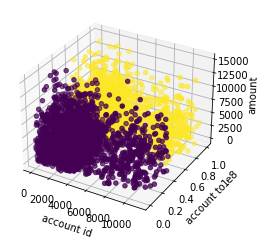

In [14]:
#x, y = make_moons(200, noise=.05, random_state=0)
#labels = KMeans(2, random_state=0).fit_predict(order_3col)
labels = KMeans(2, random_state=0).fit_predict(order_3col)
print(labels)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('account id')
ax.set_ylabel('account to')
ax.set_zlabel('amount')

#labels = KMeans(3, random_state=0).fit_predict(x)
ax.scatter(order_3col['account_id'], order_3col['account_to'], order_3col['amount'], c=labels)
            #s=50, cmap='viridis');
plt.show()

In [15]:
cluster_df= pd.DataFrame(labels, columns=['cluster'])
order_cluster=pd.concat([order_3col, cluster_df], axis=1)

In [16]:
# obtaining the centers of the clusters
centroids = kmeans.cluster_centers_# points array will be used to reach the index easy
print(centroids.shape)
#order_cluster_3col = order_cluster[order_cluster['cluster'] == i].drop(['cluster'], axis=1)
#points = np.empty((0,len(order_cluster_3col)), float)# distances will be used to calculate outliers
points = []
#print(points.shape)
distances = np.empty((0,len(order_cluster)), float)# getting points and distances
all_points = []
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    order_cluster_3col = order_cluster[order_cluster['cluster'] == i].drop(['cluster'], axis=1)
    distances = np.append(distances, cdist([center_elem],order_cluster_3col[order_cluster['cluster'] == i], 'euclidean')) 
    points.append(order_cluster_3col) 
all_points = points[0]
dist_df= pd.DataFrame(distances, columns=['distances'])
all_points_df=pd.DataFrame(all_points)
all_points_dist=pd.concat([all_points_df, dist_df], axis=1)

(2, 3)


<ipython-input-16-404b86c37676>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distances = np.append(distances, cdist([center_elem],order_cluster_3col[order_cluster['cluster'] == i], 'euclidean'))
<ipython-input-16-404b86c37676>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distances = np.append(distances, cdist([center_elem],order_cluster_3col[order_cluster['cluster'] == i], 'euclidean'))


In [23]:
#percentile = 80
percentile = 95
# getting outliers whose distances are greater than some percentile
outliers_where =np.where(distances > np.percentile(distances, percentile))
all_points_dist_list = np.array(all_points_dist)
outliers = all_points_dist_list[outliers_where]

In [24]:
print(outliers.shape)

(324, 4)


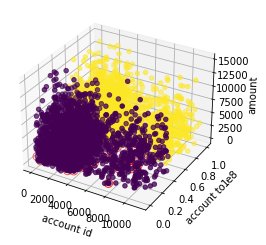

In [25]:
fig = plt.figure()# plotting initial data

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('account id')
ax.set_ylabel('account to')
ax.set_zlabel('amount')

#labels = KMeans(3, random_state=0).fit_predict(x)
ax.scatter(order_3col['account_id'], order_3col['account_to'], order_3col['amount'], c=labels)
            #s=50, cmap='viridis');
ax.scatter(*zip(*outliers),marker="o",facecolor="None",edgecolor="r",s=70);
ax.scatter(*zip(*centroids),marker="o",facecolor="b",edgecolor="b",s=70);
plt.show()

###  <center> -------------------- End of Demo --------------------

###### I skipped the visualizations for the rest of the analysis procedure as it is not needed for the main program.

### Order & Transaction Dataframes

In [24]:
# working with 'order' dataframe and 'transaction' dataframe
a = (order['account_id'],order['account_to'],order['amount'])
b = (transaction['account_id'],transaction['balance'],transaction['amount'])

In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(a)

In [ ]:
x, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(x)
#labels = KMeans(3, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis');

### Account & Transaction Dataframes

In [28]:
# working with 'account' dataframe and 'transaction' dataframe
e = (account['account_id'],account['district_id'])
f = (transaction['account_id'],transaction['amount'])

In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(e,f, test_size = 0.2, random_state = 0)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(e)

##### Note: 
The dataset consisists of several csv files, but I have used only three of the files they serve the pupose of my research. the files I used are:

1) order.csv

2) account.csv

3) transaction.csv
    